In [1]:
!pip install matplotlib seaborn scikit-learn

# Install susie_pca with
# ```bash
# git clone https://github.com/mancusolab/susiepca.git
# cd susiepca
# pip install -e .
# ```

In [2]:
import jax
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import seaborn as sns

from sppcax.models import PPCA
import susiepca as susp

from sklearn.decomposition import PCA, FactorAnalysis, SparsePCA, TruncatedSVD

div = sns.diverging_palette(250, 10, as_cmap=True)

jax.config.update("jax_enable_x64", True)

In [3]:
z_dim = 4
Z, W, X = susp.sim.generate_sim(seed = 11, l_dim = 10, n_dim = 360, p_dim =80, z_dim = z_dim, effect_size = 1)

In [4]:
results = susp.infer.susie_pca(X, z_dim = 4, l_dim = 10, max_iter=200)

Iter [1] | ELBO = -18869.307 | E[logl] = -17373.062 | -KL[Z] = -1216.434 | -KL[W] = -200.544 | -KL[G] = -79.267
Iter [2] | ELBO = -17607.202 | E[logl] = -15996.511 | -KL[Z] = -1375.845 | -KL[W] = -105.492 | -KL[G] = -129.354
Iter [3] | ELBO = -17336.448 | E[logl] = -15733.410 | -KL[Z] = -1394.989 | -KL[W] = -80.286 | -KL[G] = -127.762
Iter [4] | ELBO = -17262.902 | E[logl] = -15695.203 | -KL[Z] = -1360.952 | -KL[W] = -78.990 | -KL[G] = -127.757
Iter [5] | ELBO = -17213.761 | E[logl] = -15681.194 | -KL[Z] = -1326.025 | -KL[W] = -78.859 | -KL[G] = -127.682
Iter [6] | ELBO = -17175.082 | E[logl] = -15673.302 | -KL[Z] = -1295.356 | -KL[W] = -78.796 | -KL[G] = -127.628
Iter [7] | ELBO = -17142.943 | E[logl] = -15668.191 | -KL[Z] = -1268.409 | -KL[W] = -78.754 | -KL[G] = -127.589
Iter [8] | ELBO = -17115.734 | E[logl] = -15664.637 | -KL[Z] = -1244.817 | -KL[W] = -78.720 | -KL[G] = -127.560
Iter [9] | ELBO = -17092.715 | E[logl] = -15662.072 | -KL[Z] = -1224.419 | -KL[W] = -78.690 | -KL[G] = 

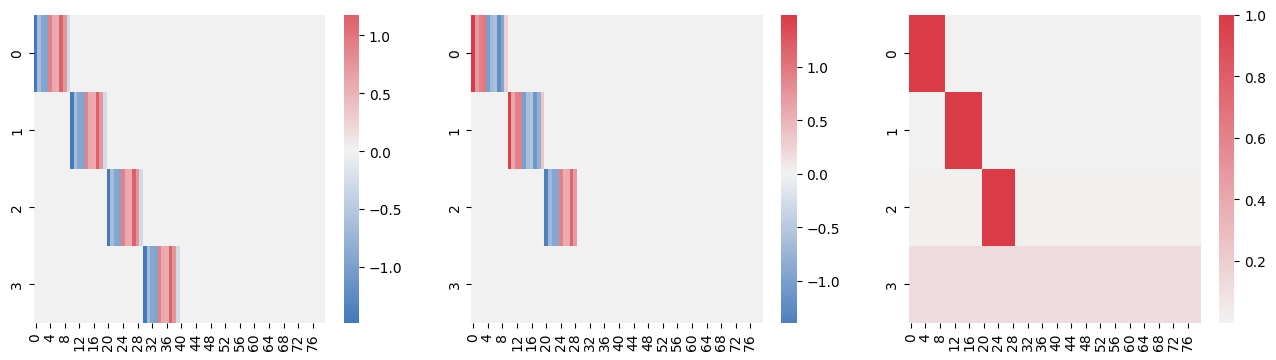

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Heatmap of true loading matrix
sns.heatmap(W, cmap = div, fmt = ".2f",center = 0, ax=axes[0]);

# Heatmap of estimate loading matrix
W_hat = results.W
sns.heatmap(W_hat, cmap = div, fmt = ".2f", center = 0, ax=axes[1]);

# Heatmap of PIPs
pip = results.pip
sns.heatmap(pip, cmap = div, fmt = ".2f", center = 0, ax=axes[2]);

Text(0.5, 1.0, 'Sparse PCA')

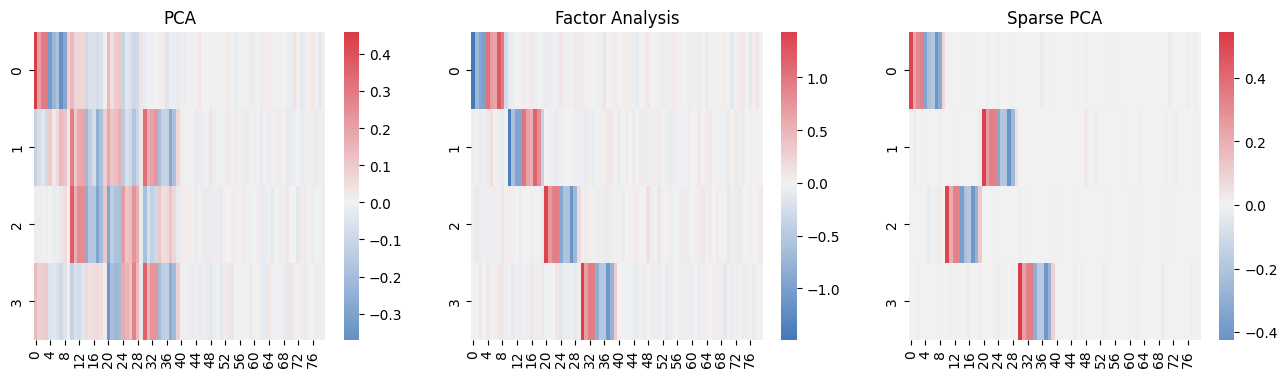

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
u, s, v = jnp.linalg.svd(X, full_matrices=False)

pca_z= (u * s[None])[..., :z_dim]

pca_w = v[:z_dim]

pca = TruncatedSVD(n_components=z_dim)
res = pca.fit(X)

sns.heatmap(res.components_, cmap = div, fmt = ".2f", center = 0, ax=axes[0])
axes[0].set_title('PCA')

fa = FactorAnalysis(n_components=z_dim, rotation='varimax')
res = fa.fit(X)

sns.heatmap(res.components_, cmap = div, fmt = ".2f", center = 0, ax=axes[1])
axes[1].set_title('Factor Analysis')

spca = SparsePCA(n_components=z_dim)
res = spca.fit(X)

sns.heatmap(res.components_, cmap = div, fmt = ".2f", center = 0, ax=axes[2])
axes[2].set_title('Sparse PCA')